In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
x=np.array([0,1,2,3,4,5,6])
y=np.array([1,6,17,34,57,86,121])

In [3]:
poly=PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1,1))

In [4]:
model = LinearRegression()
model.fit(x_poly,y)

LinearRegression()

In [5]:
LinearRegression()

LinearRegression()

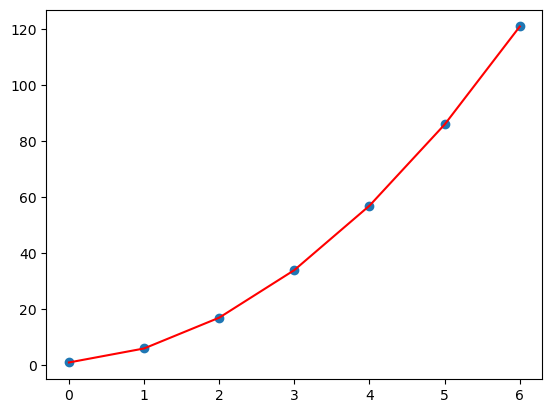

In [6]:
plt.scatter(x,y)
plt.plot(x,model.predict(x_poly),color="red")
plt.show()

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [8]:
df=pd.read_csv("/kaggle/input/column-2c-wekacsv/column_2C_weka.csv")

In [9]:
df.head(20)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [10]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


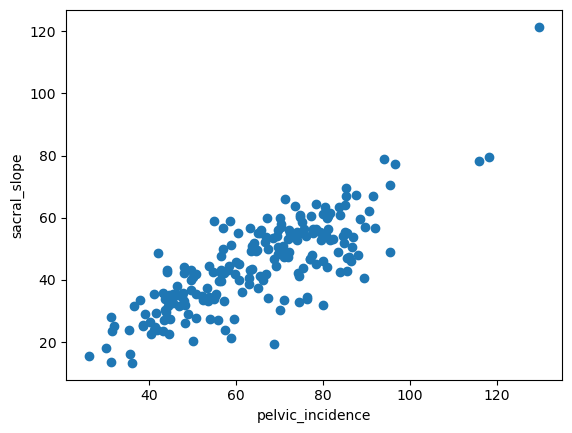

In [11]:
abnormaldata1 = df[df["class"]=="Abnormal"]
x=np.array(abnormaldata1.loc[:,"pelvic_incidence"]).reshape(-1,1)
y=np.array(abnormaldata1.loc[:,"sacral_slope"]).reshape(-1,1)

plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred))

0.427619799498007


In [14]:
poly = PolynomialFeatures(degree=12,include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr=LinearRegression()
lr.fit(x_train_trans,y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test,y_pred))

0.4450433674101977


In [15]:
X_new = np.linspace(0,132,200).reshape(200,1)

In [16]:
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

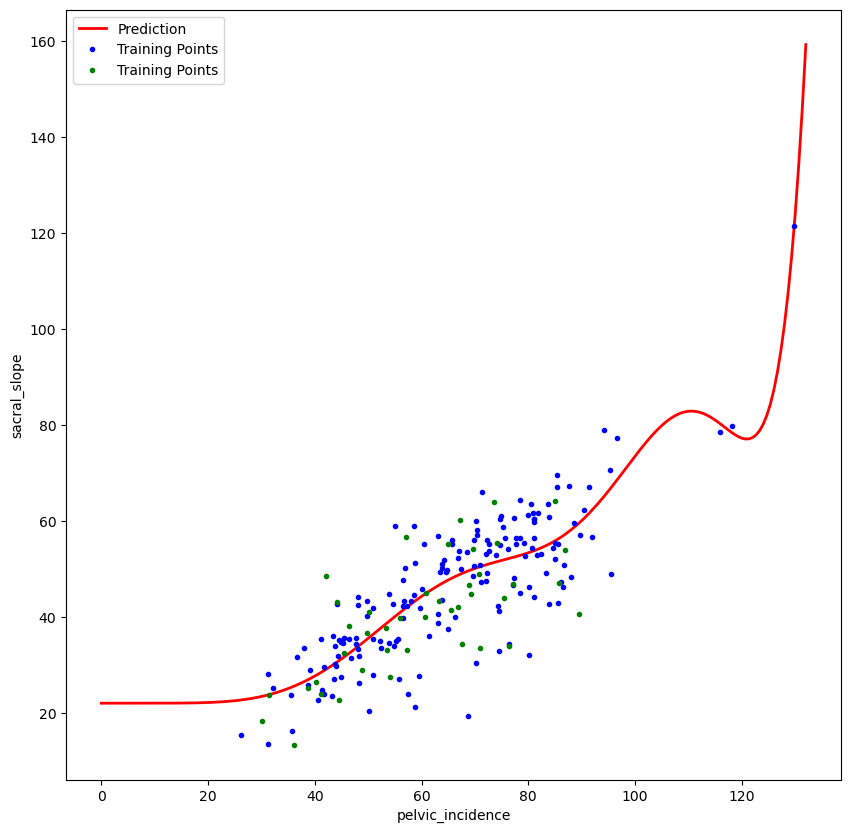

In [17]:
plt.figure(figsize=[10,10])
plt.plot(X_new,y_new,"r-",linewidth=2,label="Prediction")
plt.plot(x_train,y_train,"b.",label="Training Points")
plt.plot(x_test,y_test,"g.",label="Training Points")
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.legend()
plt.show()